# Clustering

In this notebook clustering is being applied to the correlation dataframe in order to group countries by similarity. The analysis will be performed for the different dimensions of the indicators: equality, socio-demographic and economic. In the end there is a global analysis  using all the indicators and giving a final conclusion to this notebook.

### Import

Import all the libraries and the correlation dataframe generated in the Notebook-Golden.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from numpy import sort
from sklearn.manifold import TSNE
import ipywidgets as widgets
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.cluster import AffinityPropagation
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

output_path = os.getcwd() + '/Output/'
col_country = 'Country'
col_region = 'Region'
col_year = 'Year'
col_cluster = 'Cluster'
col_1comp = '1st_component'
col_2comp = '2nd_component'

## LOADING THE DATAFRAME
We will use the Pearson Correlation Dataframe. We could use Spearman's by simply changing the name of the file to be read.

In [2]:
corr_df = pd.read_csv(output_path + 'Corr_DF_pearson.csv', index_col = col_country)
corr_df

,AgriShareGDP,CreditToAgriFishForest,EmploymentRural,TotalAgri,% Soldiers,Birth Rate,Death Rate,Homicides,Life Expectancy,Maternal Death Risk,...,% Population Growth,% Rural Population,Civil Liberties,Freedom of Expression,% Healthcare Investment,% Employment Industry,% Education Expenditure,% Men Employment,% Women Employment,Population
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.870233,NaN,NaN,NaN,NaN,-0.953124,-0.968941,NaN,0.961018,-0.953193,...,NaN,-0.931713,NaN,0.680533,NaN,-0.733667,NaN,NaN,NaN,0.929911
Albania,-0.721376,NaN,NaN,0.955863,-0.809293,-0.923325,0.893681,-0.701728,0.903398,-0.862758,...,NaN,-0.916568,0.862694,NaN,NaN,0.786991,NaN,NaN,NaN,-0.925309
Algeria,NaN,NaN,NaN,0.911970,-0.804748,0.951733,NaN,NaN,0.863359,NaN,...,0.905385,-0.813765,0.808796,NaN,0.656106,0.906667,NaN,NaN,NaN,0.716609
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.935892
Angola,NaN,NaN,NaN,NaN,-0.810890,-0.675961,-0.846921,NaN,0.837416,-0.880651,...,NaN,-0.797670,0.610423,0.528551,NaN,NaN,NaN,NaN,NaN,0.731495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,-0.833228,NaN,NaN,NaN,-0.843556,0.620577,-0.731226,NaN,0.871543,-0.825993,...,0.810501,-0.852934,NaN,NaN,0.926815,0.912074,NaN,NaN,NaN,0.839731
Vanuatu,NaN,-0.507810,NaN,0.868536,NaN,-0.867276,-0.895642,NaN,0.967898,-0.977386,...,NaN,-0.981182,0.820181,NaN,-0.790236,0.475654,NaN,NaN,NaN,0.946512
Yemen,NaN,NaN,NaN,0.675176,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.784325,0.837351,NaN,NaN,NaN,0.595893


## DEFINING THE GROUPS

In order to carry out a more sensitive study, we will not only study the indicators as a whole, but also separate them in the following groups to study them more in-depth.

In [3]:
econ_ind = 'Economic Indicators'
socdem_ind = 'Social-demographic Indicators'
eq_ind = 'Equality Indicators'
all_ind = 'All indicators'

ind_dict = {
    econ_ind: ['CreditToAgriFishForest', 'AgriShareGDP', 'EmploymentRural', '%EmploymentAgriFishForest', 'TotalAgri', '% Soldiers', '% Healthcare Investment', '% Employment Industry', '% Education Expenditure'],
    socdem_ind: ['Marriage Rate', 'Birth Rate', 'Death Rate', 'Homicides', 'Life Expectancy', 'Maternal Death Risk', 'Literacy Rate', 'Infant Mortality', '% Population Growth', '% Rural Population', 'Suicide Rate', 'Population'],
    eq_ind: ['Gender Equality', 'Gender Inequality','% Men Employment', '% Women Employment', 'Women Schooling Years', 'Men Schooling Years', 'Freedom of Expression', '% Undernourishment', 'Civil Liberties', 'Gini'],
    all_ind: corr_df.columns.tolist()
}

# Keep only the ones that have been carried on to this point.

indicators = set(corr_df.columns)
for ind in ind_dict:
    ind_dict[ind] = list(set(ind_dict[ind]) & indicators)

# Divide the corr_df into slices for each group of indicators, normalize them and store them into a dict.
df_dict = {}
for ind in ind_dict:
    df_norm = corr_df.copy()
    df_norm.drop(df_norm.columns.difference(ind_dict[ind]), axis = 'columns', inplace=True)
    df_norm = df_norm.dropna(how = 'all').fillna(value = 0)
    df_norm.name = ind
    df_dict[ind] = df_norm

for ind in ind_dict:
    print(df_dict[ind].name)
    display(df_dict[ind])

Economic Indicators


,AgriShareGDP,CreditToAgriFishForest,EmploymentRural,TotalAgri,% Soldiers,% Healthcare Investment,% Employment Industry,% Education Expenditure
Country,,,,,,,,
Afghanistan,-0.870233,0.000000,0.0,0.000000,0.000000,0.000000,-0.733667,0.0
Albania,-0.721376,0.000000,0.0,0.955863,-0.809293,0.000000,0.786991,0.0
Algeria,0.000000,0.000000,0.0,0.911970,-0.804748,0.656106,0.906667,0.0
Angola,0.000000,0.000000,0.0,0.000000,-0.810890,0.000000,0.000000,0.0
Antigua and Barbuda,0.000000,-0.889263,0.0,0.702760,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...
Uzbekistan,-0.833228,0.000000,0.0,0.000000,-0.843556,0.926815,0.912074,0.0
Vanuatu,0.000000,-0.507810,0.0,0.868536,0.000000,-0.790236,0.475654,0.0
Yemen,0.000000,0.000000,0.0,0.675176,0.000000,-0.784325,0.837351,0.0


Social-demographic Indicators


,Birth Rate,Death Rate,Homicides,Life Expectancy,Maternal Death Risk,Infant Mortality,% Population Growth,% Rural Population,Population
Country,,,,,,,,,
Afghanistan,-0.953124,-0.968941,0.000000,0.961018,-0.953193,-0.960322,0.000000,-0.931713,0.929911
Albania,-0.923325,0.893681,-0.701728,0.903398,-0.862758,-0.945807,0.000000,-0.916568,-0.925309
Algeria,0.951733,0.000000,0.000000,0.863359,0.000000,-0.892046,0.905385,-0.813765,0.716609
Andorra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.935892
Angola,-0.675961,-0.846921,0.000000,0.837416,-0.880651,-0.846460,0.000000,-0.797670,0.731495
...,...,...,...,...,...,...,...,...,...
Uzbekistan,0.620577,-0.731226,0.000000,0.871543,-0.825993,-0.892046,0.810501,-0.852934,0.839731
Vanuatu,-0.867276,-0.895642,0.000000,0.967898,-0.977386,0.000000,0.000000,-0.981182,0.946512
Yemen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.595893


Equality Indicators


,Civil Liberties,Freedom of Expression,% Men Employment,% Women Employment
Country,,,,
Afghanistan,0.000000,0.680533,0.000000,0.000000
Albania,0.862694,0.000000,0.000000,0.000000
Algeria,0.808796,0.000000,0.000000,0.000000
Angola,0.610423,0.528551,0.000000,0.000000
Argentina,0.000000,-0.597334,0.000000,0.000000
...,...,...,...,...
United Kingdom,-0.588531,0.000000,0.000000,0.626019
United States,-0.654842,0.000000,-0.703313,-0.744901
Vanuatu,0.820181,0.000000,0.000000,0.000000


All indicators


,AgriShareGDP,CreditToAgriFishForest,EmploymentRural,TotalAgri,% Soldiers,Birth Rate,Death Rate,Homicides,Life Expectancy,Maternal Death Risk,...,% Population Growth,% Rural Population,Civil Liberties,Freedom of Expression,% Healthcare Investment,% Employment Industry,% Education Expenditure,% Men Employment,% Women Employment,Population
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.870233,0.000000,0.0,0.000000,0.000000,-0.953124,-0.968941,0.000000,0.961018,-0.953193,...,0.000000,-0.931713,0.000000,0.680533,0.000000,-0.733667,0.0,0.0,0.0,0.929911
Albania,-0.721376,0.000000,0.0,0.955863,-0.809293,-0.923325,0.893681,-0.701728,0.903398,-0.862758,...,0.000000,-0.916568,0.862694,0.000000,0.000000,0.786991,0.0,0.0,0.0,-0.925309
Algeria,0.000000,0.000000,0.0,0.911970,-0.804748,0.951733,0.000000,0.000000,0.863359,0.000000,...,0.905385,-0.813765,0.808796,0.000000,0.656106,0.906667,0.0,0.0,0.0,0.716609
Andorra,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.935892
Angola,0.000000,0.000000,0.0,0.000000,-0.810890,-0.675961,-0.846921,0.000000,0.837416,-0.880651,...,0.000000,-0.797670,0.610423,0.528551,0.000000,0.000000,0.0,0.0,0.0,0.731495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,-0.833228,0.000000,0.0,0.000000,-0.843556,0.620577,-0.731226,0.000000,0.871543,-0.825993,...,0.810501,-0.852934,0.000000,0.000000,0.926815,0.912074,0.0,0.0,0.0,0.839731
Vanuatu,0.000000,-0.507810,0.0,0.868536,0.000000,-0.867276,-0.895642,0.000000,0.967898,-0.977386,...,0.000000,-0.981182,0.820181,0.000000,-0.790236,0.475654,0.0,0.0,0.0,0.946512
Yemen,0.000000,0.000000,0.0,0.675176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.784325,0.837351,0.0,0.0,0.0,0.595893


## t-SNE

The algorithm of t-SNE (t-Distributed Stochastic Neighbor Embedding) is used to reduce the dimensionality of all the indicators to only 2 components. It admits a number of parameters to tune the procedure and obtain an optimal output: 
- N-components: the dimensions to analyze.
- Perplexity: measurement of how well a probability distribution or probability model predicts a sample.
- N-iter: iterations for the optimization
- Learning rate: how fast the algorithm learns. A high value may cause a ball form of the data.
- Init: Initialization of embedding. 'pca' is the new default for newer versions.

In this cell, we define the different values that will be used for each group of indicators.

In [4]:
# The TSNE algorithm admits a number of parameters
tsne_dict = {
    econ_ind: TSNE(n_components = 2, perplexity = 5, n_iter = 20000, learning_rate = 100.0, init = 'pca'),
    socdem_ind: TSNE(n_components = 2, perplexity = 5, n_iter = 20000, learning_rate = 100.0, init = 'pca'),
    eq_ind: TSNE(n_components = 2, perplexity = 5, n_iter = 20000, learning_rate = 100.0, init = 'pca'),
    all_ind: TSNE(n_components = 2, perplexity = 5, n_iter = 20000, learning_rate = 100.0, init = 'pca')
}

## CLUSTERING

### Affinity Propagation

The clustering method used in the notebook is Affinity Propagation. The reason behind choosing this one is because it is suited for our data: many clusters with uneven cluster size; also, it can simply be optmized changing 1 parameter, "damping". 
- Damping: is the extent to which the current value is maintained relative to incoming values (weighted 1 - damping).

Again, in this cell we will calibrate the clustering algorithm for each indicator group.

In [5]:
afprop_dict = {
    econ_ind: AffinityPropagation(damping=0.5),
    socdem_ind: AffinityPropagation(damping=0.5),
    eq_ind: AffinityPropagation(damping=0.5),
    all_ind: AffinityPropagation(damping=0.5)
}

In [6]:


for ind in ind_dict:
    df_norm = df_dict[ind]

    # Apply the TSNE chosen for that indicator
    df_tsne = pd.DataFrame(tsne_dict[ind].fit_transform(df_norm))

    # Scale the result
    scaled_df = pd.DataFrame(StandardScaler().fit_transform(df_tsne), index = df_norm.index, columns = [col_1comp, col_2comp])
    
    # Apply Affinity Propagation
    affinity = afprop_dict[ind].fit(scaled_df)

    # Update the DataFrame with the resulting Cluster labels
    labels_affinity = affinity.labels_
    df_dict[ind].loc[:, col_cluster] = labels_affinity
    scaled_df[col_cluster] = labels_affinity
    scaled_df[col_cluster] = scaled_df[col_cluster].astype(str)

    # Show the resulting chart
    fig = px.scatter(scaled_df, x = col_1comp, y = col_2comp, text = scaled_df.index, size_max=100, color=col_cluster, category_orders={col_cluster: sort(list(set(scaled_df.loc[:, col_cluster])))})
    fig.update_layout(title_text=ind, title_x=0.5)
    fig.update_traces(textposition='top center')
    fig.show()

## Widget Clustering

In order to explore the clustering results given a country, we can choose that country and the group of indicators in the table below, to see what other countries are in the same cluster for the selected group of indicators.

In [7]:
def tableCountry(Ind, Country):
    try:
        # Find the cluster Country belongs to.
        cluster_number = df_dict[Ind].loc[df_dict[Ind].index == Country, col_cluster].item()

        # Retrieve the Dataframe with the selected indicators, and filter to only show the rows (countries) belonging to the cluster. Drop the cluster number column as it is redundant.
        df_ind = df_dict[Ind]
        df = df_ind.loc[df_ind[col_cluster] == cluster_number].drop(col_cluster, axis = 'columns')

        # Format the Dataframe representation.
        df_s = df.style
        df_s.apply_index(lambda i: ['background-color: #aadfff; font-weight: 500' if c == Country else '' for c in i], axis = 0)
        df_s.apply(lambda row: ['background-color: #ccebff;' if row.name == Country else '' for cell in row], axis = 1)
        df_s.set_table_styles([{'selector': 'td:hover', 'props': [('background-color', '#ddfdff')]}])
        tt = {}
        for col in df.columns:
            tt[col] = 'Column median: ' + str(df.loc[:, col].median())
        df_s.set_tooltips(pd.DataFrame(tt, index = df.index))

        # Display a short descriptive title and the Dataframe.
        display(Country + ' belongs to Cluster ' + str(cluster_number) + '. This Cluster contains a total of ' + str(df.shape[0]) + ' countries.')
        display(df_s)
    except Exception:
        return print('No indicators available for this country.')

@interact(
    Indicators = df_dict.keys(),
    Country = sort(corr_df.index.tolist()))

def g(Indicators = 'Equality indicators', Country = 'Afghanistan'):
    return tableCountry(Indicators, Country)

interactive(children=(Dropdown(description='Indicators', options=('Economic Indicators', 'Social-demographic I…

### SAVING CLUSTERING RESULTS

We now write a .csv file for each group of indicators and the clusters each countries belongs to. By default, we sort the rows by cluster.

In [11]:
cluster_folder = os.getcwd() + '/Output/Cluster/'

if not os.path.exists(cluster_folder):
            os.makedirs(cluster_folder)

for ind in ind_dict:
    print(ind)
    df = df_dict[ind]
    df = df.set_index(['Cluster', df.index]).sort_index()
    df.to_csv(cluster_folder + ind + '.csv')
    display(df)


Economic Indicators


AgriShareGDP  CreditToAgriFishForest  \
Cluster Country                                                       
0       Albania                   -0.721376                0.000000   
        Argentina                 -0.503461                0.656928   
        Azerbaijan                -0.858162                0.000000   
        Bangladesh                -0.907601               -0.599605   
        Brazil                    -0.682473                0.000000   
...                                     ...                     ...   
10      Samoa                     -0.952087                0.000000   
        Sao Tome and Principe     -0.729275                0.000000   
        Serbia                    -0.793805                0.000000   
        United Arab Emirates      -0.927943                0.000000   
        Zimbabwe                  -0.674981                0.000000   

                               EmploymentRural  TotalAgri  % Soldiers  \
Cluster Country                                                         
0       Albania                            0.0   0.955863   -0.809293   
        Argentina                          0.0   0.950021   -0.696227   
        Azerbaijan                         0.0   0.984559   -0.694244   
        Bangladesh                         0.0   0.959856   -0.636255   
        Brazil                             0.0   0.983090   -0.753701   
...                                        ...        ...         ...   
10      Samoa                              0.0   0.000000    0.000000   
        Sao Tome and Principe              0.0   0.000000    0.000000   
        Serbia                             0.0   0.000000   -0.895995   
        United Arab Emirates               0.0   0.000000   -0.839875   
        Zimbabwe                           0.0   0.000000   -0.699115   

                               % Healthcare Investment  % Employment Industry  \
Cluster Country                                                                 
0       Albania                               0.000000               0.786991   
        Argentina                             0.000000               0.726257   
        Azerbaijan                           -0.663217               0.857352   
        Bangladesh                           -0.855029               0.807895   
        Brazil                                0.000000               0.715622   
...                                                ...                    ...   
10      Samoa                                 0.672879              -0.902946   
        Sao Tome and Principe                 0.000000              -0.876400   
        Serbia                                0.000000              -0.778655   
        United Arab Emirates                  0.000000              -0.926257   
        Zimbabwe                              0.000000              -0.957352   

                               % Education Expenditure  
Cluster Country                                         
0       Albania                               0.000000  
        Argentina                            -0.640218  
        Azerbaijan                           -0.848901  
        Bangladesh                            0.000000  
        Brazil                                0.855377  
...                                                ...  
10      Samoa                                 0.000000  
        Sao Tome and Principe                 0.688839  
        Serbia                                0.000000  
        United Arab Emirates                  0.000000  
        Zimbabwe                              0.000000  

[167 rows x 8 columns]

Social-demographic Indicators


Birth Rate  Death Rate  Homicides  Life Expectancy  \
Cluster Country                                                            
0       Afghanistan    -0.953124   -0.968941   0.000000         0.961018   
        Botswana       -0.867502   -0.951373   0.000000         0.952525   
        Burundi        -0.842824   -0.970891   0.000000         0.978385   
        Cameroon       -0.934079   -0.984679   0.000000         0.980169   
        Djibouti       -0.945981   -0.994935   0.000000         0.996856   
...                          ...         ...        ...              ...   
9       Russia          0.775658   -0.804394  -0.885042         0.778920   
        Sweden          0.732351   -0.851310   0.000000         0.892014   
        Tajikistan      0.640529   -0.919454   0.000000         0.942219   
        Turkmenistan    0.000000   -0.945071   0.000000         0.972749   
        Uzbekistan      0.620577   -0.731226   0.000000         0.871543   

                      Maternal Death Risk  Infant Mortality  \
Cluster Country                                               
0       Afghanistan             -0.953193         -0.960322   
        Botswana                -0.963642         -0.799478   
        Burundi                 -0.946126         -0.983315   
        Cameroon                -0.970054         -0.979033   
        Djibouti                -0.815858         -0.960035   
...                                   ...               ...   
9       Russia                  -0.859358         -0.796243   
        Sweden                  -0.435390         -0.933905   
        Tajikistan              -0.860032         -0.921513   
        Turkmenistan            -0.909132         -0.871741   
        Uzbekistan              -0.825993         -0.892046   

                      % Population Growth  % Rural Population  Population  
Cluster Country                                                            
0       Afghanistan              0.000000           -0.931713    0.929911  
        Botswana                 0.000000           -0.954849    0.950102  
        Burundi                  0.000000           -0.987871    0.988052  
        Cameroon                 0.000000           -0.984259    0.975235  
        Djibouti                 0.000000           -0.989181    0.978684  
...                                   ...                 ...         ...  
9       Russia                   0.878687           -0.572207    0.000000  
        Sweden                   0.817130           -0.723628    0.811345  
        Tajikistan               0.957414           -0.580328    0.898720  
        Turkmenistan             0.886601           -0.949027    0.950749  
        Uzbekistan               0.810501           -0.852934    0.839731  

[175 rows x 9 columns]

Equality Indicators


Civil Liberties  Freedom of Expression  \
Cluster Country                                                
0       Afghanistan          0.000000               0.680533   
        Burkina Faso         0.000000               0.745158   
        Canada               0.000000               0.723074   
        Eswatini             0.000000               0.636240   
        Guinea               0.000000               0.625618   
...                               ...                    ...   
7       Suriname            -0.492572              -0.606684   
        Tajikistan          -0.870417              -0.743880   
        Thailand            -0.799532              -0.752925   
        Uganda              -0.710019              -0.768839   
        Zambia              -0.572971              -0.555529   

                      % Men Employment  % Women Employment  
Cluster Country                                             
0       Afghanistan           0.000000                 0.0  
        Burkina Faso          0.000000                 0.0  
        Canada               -0.657411                 0.0  
        Eswatini              0.000000                 0.0  
        Guinea                0.000000                 0.0  
...                                ...                 ...  
7       Suriname              0.000000                 0.0  
        Tajikistan            0.000000                 0.0  
        Thailand              0.000000                 0.0  
        Uganda                0.000000                 0.0  
        Zambia                0.000000                 0.0  

[122 rows x 4 columns]

All indicators


AgriShareGDP  CreditToAgriFishForest  EmploymentRural  \
Cluster Country                                                                 
0       Andorra             0.000000                0.000000         0.000000   
        Austria            -0.828536                0.000000         0.847060   
        Bermuda            -0.852117                0.000000         0.000000   
        Cayman Islands      0.832945                0.000000         0.000000   
        Congo              -0.636275                0.000000         0.000000   
...                              ...                     ...              ...   
9       Slovenia           -0.863172                0.000000        -0.791117   
        Spain              -0.924602                0.000000         0.000000   
        Switzerland        -0.926746                0.899981         0.000000   
        United Kingdom     -0.716390                0.000000         0.000000   
        United States       0.000000                0.000000        -0.933213   

                        TotalAgri  % Soldiers  Birth Rate  Death Rate  \
Cluster Country                                                         
0       Andorra          0.000000    0.000000    0.000000    0.000000   
        Austria          0.938655   -0.780851    0.000000    0.000000   
        Bermuda          0.000000    0.000000   -0.809464    0.453401   
        Cayman Islands   0.000000    0.000000   -0.766263    0.000000   
        Congo            0.804072   -0.725357    0.000000    0.000000   
...                           ...         ...         ...         ...   
9       Slovenia         0.903636   -0.458682    0.637707    0.000000   
        Spain            0.891549   -0.828939    0.000000   -0.466823   
        Switzerland      0.938234    0.000000    0.000000   -0.875918   
        United Kingdom   0.865545   -0.841970    0.000000    0.000000   
        United States    0.859802   -0.871861   -0.934595    0.000000   

                        Homicides  Life Expectancy  Maternal Death Risk  ...  \
Cluster Country                                                          ...   
0       Andorra          0.000000         0.000000             0.000000  ...   
        Austria          0.000000         0.933147             0.000000  ...   
        Bermuda          0.787960         0.876173             0.000000  ...   
        Cayman Islands   0.000000         0.000000             0.000000  ...   
        Congo            0.000000         0.000000             0.000000  ...   
...                           ...              ...                  ...  ...   
9       Slovenia        -0.860796         0.870085            -0.633361  ...   
        Spain           -0.743388         0.694753             0.000000  ...   
        Switzerland     -0.917309         0.966205            -0.900268  ...   
        United Kingdom  -0.741227         0.787113             0.000000  ...   
        United States   -0.626160         0.723664             0.974963  ...   

                        % Population Growth  % Rural Population  \
Cluster Country                                                   
0       Andorra                    0.000000            0.000000   
        Austria                    0.000000            0.842808   
        Bermuda                   -0.657904            0.000000   
        Cayman Islands            -0.840785            0.000000   
        Congo                      0.000000            0.000000   
...                                     ...                 ...   
9       Slovenia                   0.000000           -0.794734   
        Spain                      0.000000           -0.634473   
        Switzerland                0.000000           -0.933934   
        United Kingdom             0.789781           -0.737243   
        United States             -0.767053           -0.994842   

                        Civil Liberties  Freedom of Expression  \
Cluster Country                          

## VENN DIAGRAM

Finally as a more visual way to represent the clustering, we show a Venn diagram for any given country so we can observe all the countries that are related to it based on the different indicators group.

NOTE: the central intersection does not correspond to the all indicators clustering, as they have obtained by different methods. The intersection is more restrictive and contains fewer countries than the all indicators group.

In [12]:
def VennOut(Country):

    set_econ = set(df_dict[econ_ind].loc[lambda df: df[col_cluster] == df.loc[Country, col_cluster]].index.to_list())
    set_socdem = set(df_dict[socdem_ind].loc[lambda df: df[col_cluster] == df.loc[Country, col_cluster]].index.to_list())
    set_eq = set(df_dict[eq_ind].loc[lambda df: df[col_cluster] == df.loc[Country, col_cluster]].index.to_list())

    venn = venn3([set_econ, set_socdem, set_eq], (econ_ind, socdem_ind, eq_ind))

    venn.get_label_by_id('100').set_text('\n'.join(set_econ - set_socdem - set_eq)) # Only econ
    venn.get_label_by_id('010').set_text('\n'.join(set_socdem - set_econ - set_eq)) # Only socdem
    venn.get_label_by_id('001').set_text('\n'.join(set_eq - set_econ - set_socdem)) # Only eq

    # The three pair-intersections is guaranteed only if there is an intersection of the three groups.
    if len(set_econ & set_socdem & set_eq):
        venn.get_label_by_id('111').set_text('\n'.join(set_econ & set_socdem & set_eq))
        venn.get_label_by_id('110').set_text('\n'.join(set_econ & set_socdem - set_eq))
        venn.get_label_by_id('101').set_text('\n'.join(set_econ & set_eq - set_socdem))
        venn.get_label_by_id('011').set_text('\n'.join(set_socdem & set_eq - set_econ))
    else:
        # If no center, check the intersections that do exist.
        if len(set_econ & set_socdem - set_eq):
            venn.get_label_by_id('110').set_text('\n'.join(set_econ & set_socdem - set_eq))
        if len(set_econ & set_eq - set_socdem):
            venn.get_label_by_id('101').set_text('\n'.join(set_econ & set_eq - set_socdem))
        if len(set_socdem & set_eq - set_econ):
            venn.get_label_by_id('011').set_text('\n'.join(set_socdem & set_eq - set_econ))

    plt.rcParams["figure.figsize"] = (12, 12)
    plt.show()


@interact(
    Country = sort(corr_df.index.tolist()))

def g(Country = 'Spain'):
    return VennOut(Country)

interactive(children=(Dropdown(description='Country', index=154, options=('Afghanistan', 'Albania', 'Algeria',…

In [10]:

X_optics = pd.DataFrame(StandardScaler().fit_transform(new_df_tsne))

'''Apply OPTICS'''
optics = OPTICS(xi=.35, min_cluster_size=3, min_samples=5).fit_predict(X_optics)
#labels_optics = optics.labels_

plt.figure(figsize=(8,8))
plt.title('OPTICS',fontsize= 20)
plt.xlabel('Feature 1',fontsize= 18)
plt.ylabel('Feature 2',fontsize= 18)
fig = plt.scatter(X_optics[0], X_optics[1], c= optics)


NameError: name 'new_df_tsne' is not defined

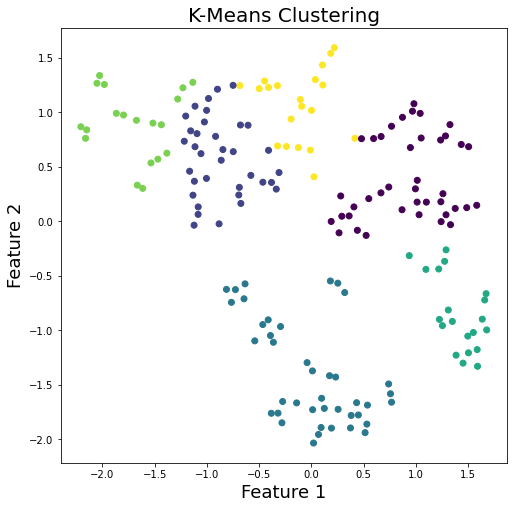

In [ ]:

X_kmeans = pd.DataFrame(StandardScaler().fit_transform(new_df_tsne))
X_kmeans.index = new_df_tsne.index
'''Apply K-Means'''
from sklearn.cluster import *
from sklearn.mixture import GaussianMixture


kmean_clusters =   MiniBatchKMeans(n_clusters=6).fit_predict(X_kmeans)

plt.figure(figsize = (8,8))
plt.title('K-Means Clustering',fontsize= 20)
plt.xlabel('Feature 1', fontsize=18)
plt.ylabel('Feature 2', fontsize=18)
f = plt.scatter(X_kmeans[0],X_kmeans[1],c=kmean_clusters)

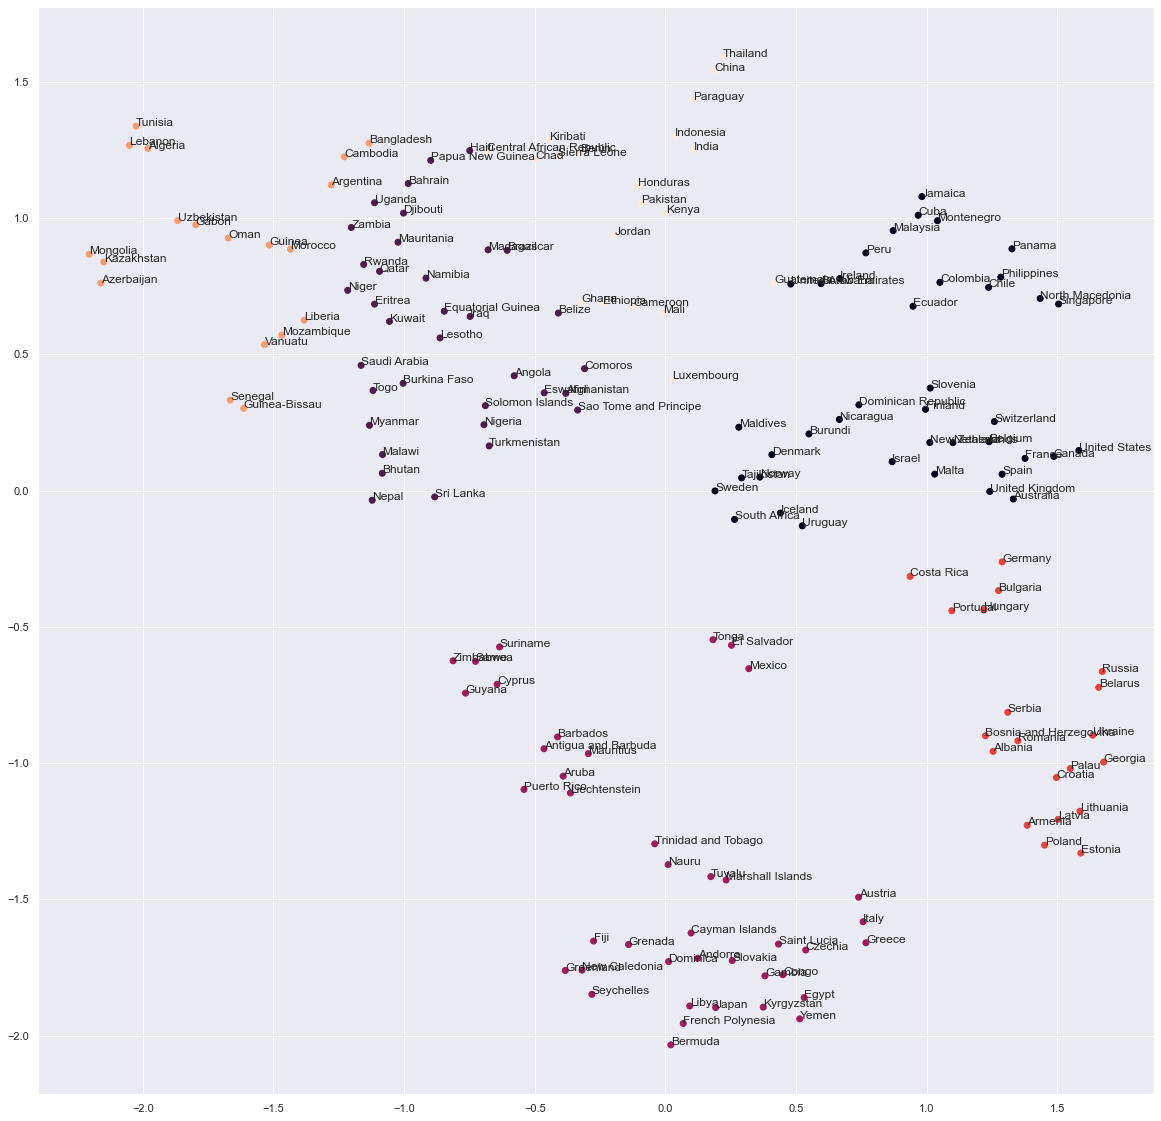

In [ ]:
sns.set(rc={'figure.figsize':(20, 20)})


z = X_kmeans[0]
y = X_kmeans[1]
n = new_df_tsne.index.get_level_values(0)
fig, ax = plt.subplots()

ax.scatter(z, y, c=kmean_clusters)



for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

In [ ]:
""" new_df_tsne['Cluster'] = kmean_clusters.tolist()
new_df_tsne """

" new_df_tsne['Cluster'] = kmean_clusters.tolist()\nnew_df_tsne "

In [ ]:

new_df_tsne.to_csv(write_path + '/Cluster.csv')